In [1]:
import matplotlib.pylab as plt
%matplotlib inline

from minisom import MiniSom
import numpy as np
from scipy import spatial

import math
import random

In [2]:
dim = 15
dataLen = int(2.2 ** dim)
print dataLen
mapDims = [20, 20]
epochs = 2

data = np.random.rand(dataLen, dim)
som = MiniSom(mapDims[0], mapDims[1], dim, sigma=1.0, learning_rate=1.0)
som.random_weights_init(data)

136880


In [3]:
for i in range(epochs):
    data = np.random.rand(dataLen, dim)
    som.train_batch(data, data.shape[0])
    print "epoch:", str(i).zfill(3), "-", "error:", som.quantization_error(data[:1000])

epoch: 000 - error: 1.37685416348
epoch: 001 - error: 1.37530140371


(20L, 20L, 15L)


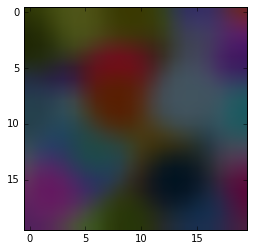

In [4]:
print som.weights.shape
plt.imshow(som.weights[:,:,:3])

In [7]:
dataDim = 15

w = som.weights[:,:,:dataDim].reshape(mapDims[0] * mapDims[1], dataDim)
print w.shape
# print w

tree = spatial.KDTree(w)

(400L, 15L)


(0, 20)

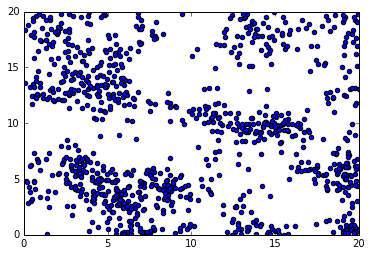

In [8]:
spread = 0.5

# seed = [random.random() for i in range(dim/2)] + [0.0] * (dim/2)
testData = []

for i in range(1000):
#     testData.append([min(1.0, max(0, x + random.random() * spread)) for x in seed])
#     testData.append(np.tile(np.random.rand(dataDim), math.ceil(float(dim)/a.shape[0]))[:dim])
    testData.append(np.random.rand(dataDim))
    
# testDataArray = np.asarray(testData)

# print "min:", np.amin(testDataArray)
# print "max:", np.amax(testDataArray)

d = [tree.query(x)[1] for x in testData]

x = [math.floor(float(i) / mapDims[0]) + np.random.rand() for i in d]
y = [float(i) % mapDims[0] + np.random.rand() for i in d]

plt.scatter(x, y)
plt.xlim(0, mapDims[0])
plt.ylim(0, mapDims[1])

In [11]:
a = [2,0,1,0]
aMax = max(a)

aOrder = [aMax - x for x in a]

print aMax
print aOrder

2
[0, 2, 1, 2]


In [20]:
A = [{'id': 0, 'scores': [2,3,4]},
     {'id': 1, 'scores': [0,5,2]},
     {'id': 2, 'scores': [1,2,3]}
    ]

A = sorted(A, key = lambda x: x['scores'][1])

print A

[{'id': 2, 'scores': [1, 2, 3]}, {'id': 0, 'scores': [2, 3, 4]}, {'id': 1, 'scores': [0, 5, 2]}]


In [26]:
i = "min"
# i = "max"

fac = (i == "min") * 2 - 1

print fac

1


In [27]:
A = [{'id': 0, 'scores': [2,3,4]},
     {'id': 1, 'scores': [0,5,2]},
     {'id': 2, 'scores': [1,2,3]}
    ]

dom = [0]

print [x for x in A if x['id'] not in dom]

[{'id': 1, 'scores': [0, 5, 2]}, {'id': 2, 'scores': [1, 2, 3]}]


In [31]:
a = [[1,2],[3,1],[0]]

a.reverse()

print a

[[0], [3, 1], [1, 2]]
